In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

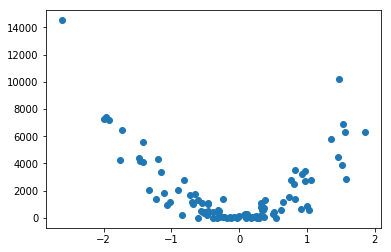

In [2]:
X, y = make_regression(n_features=1, noise=14, bias=1, random_state=42)
y = y**2

plt.scatter(X, y)
plt.show()

In [3]:
def compute_cost(X, y, W):
    return 1 / (2 * m) * np.sum((np.dot(X, W) - y) ** 2)

def normal_equation(X, y):
    A = np.linalg.pinv(np.dot(X.T, X))
    return np.dot(A, np.dot(X.T, y))

class PolynomialRegression:
    
    def __init__(self, norm_eq=True, lr=0.01, num_iters=1500):
        
        self.lr = lr
        self.num_iters = num_iters
        self.norm_eq = norm_eq
        
    def fit(self, X, y):
        if self.norm_eq:
            self.W = normal_equation(X, y)
        else:
            self.W = np.zeros((X.shape[1], 1))
            for _ in range(self.num_iters):
                cost = compute_cost(X, y, self.W)
                grad = np.dot(X.T, np.dot(X, self.W) - y)
                self.W -= self.lr * (1 / m) * grad
    
    def predict(self, X):
        return np.dot(X, self.W)

In [4]:
def polynomial_features(X, degree):
    return np.hstack([X ** i for i in range(degree+1)])

In [5]:
X_new = polynomial_features(X, degree=2)

poly = PolynomialRegression()
poly.fit(X_new, y)
preds = poly.predict(X_new)

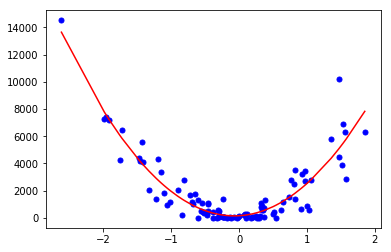

In [6]:
plt_X, plt_y = zip(*sorted(zip(X, preds)))

plt.scatter(X, y, c='b', s=25)
plt.plot(plt_X, plt_y, c='r')
plt.show()

In [7]:
# Sklearn way
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures()
X_new = poly_features.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_new, y)
preds = poly_reg.predict(X_new)

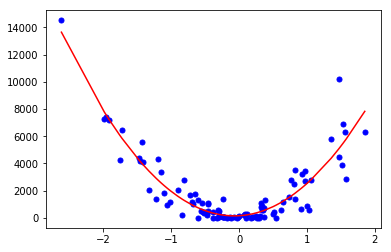

In [8]:
plt_X, plt_y = zip(*sorted(zip(X, preds)))

plt.scatter(X, y, c='b', s=25)
plt.plot(plt_X, plt_y, c='r')
plt.show()